<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:

-  <p>The input layer is the initial step where you add your data to the model.</p>

### Hidden Layer:

- <p>The hidden layer(s) is between the input layer and output layer, and are where calculations are done to the input data such as adding weights or bias.</p>

### Output Layer:

- <p>The ouput layer is the activation function the data, weights, and bias are passed through to get a prediction.</p>

### Neuron:

- <p>A neuron is a function of the inputs, combined with weights and bias, then passed through an activation fuction such as a sigmoid function to produce an output.</p>

### Weight:

- <p>A feature's weight indicates how much that feature matters in the model.</p>

### Activation Function:

- <p>The activation is the function the inputs combined with their weights and bias are passed through such as a sigmoid function.</p>

### Node Map:

- <p>A way to graphically conceptualize a neural network and its layers.</p>

### Perceptron:

- <p>A special type of neuron that is a function of its inputs combined with weights and bias, then passed through a linear function to produce a single output value.</p>

## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

The first layer of a neural network is the input layer, which is where the data is passed into the neural network. Each input is then multiplied with its weight (a number based on that feature's significance in the model), then the sum of those products are then passed through an activation function to compute an output value. If bias is added, it interacts with a single layer to affect all layers after the hidden layer it is associated with.

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [79]:
import numpy as np
import pandas as pd

data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [80]:
df.head()

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [81]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1-sx)

In [133]:
# Initialize random weights for the 2 inputs
weights = 2 * np.random.random((2,1)) -1
weights

array([[-0.83614004],
       [-0.57967122]])

In [134]:
# Convert input columns to an array
inputs = df[['x1', 'x2']].values
inputs

array([[0, 0],
       [1, 0],
       [0, 1],
       [1, 1]])

In [135]:
# Convert output column to an array
correct_outputs = df[['y']].values
correct_outputs

array([[1],
       [1],
       [1],
       [0]])

In [136]:
# Calculate weighted sum of inputs and weights
weighted_sum = np.dot(inputs, weights)
weighted_sum

array([[ 0.        ],
       [-0.83614004],
       [-0.57967122],
       [-1.41581126]])

In [137]:
# Output the activated value for the end of 1 training epoch
activated_output = sigmoid(weighted_sum)
activated_output

array([[0.5       ],
       [0.30234836],
       [0.35900825],
       [0.19531909]])

In [138]:
# take difference of output and true values to calculate error
error = correct_outputs - activated_output
error

array([[ 0.5       ],
       [ 0.69765164],
       [ 0.64099175],
       [-0.19531909]])

In [139]:
# Gradient descent/backprop - magic!
adjustments = error * sigmoid_derivative(activated_output)
adjustments

array([[ 0.11750186],
       [ 0.17048689],
       [ 0.1551934 ],
       [-0.04836701]])

In [140]:
weights = weights + np.dot(inputs.T, adjustments)
weights

array([[-0.71402015],
       [-0.47284483]])

In [144]:
inputs = df[['x1', 'x2']].assign(ones=np.ones(df.shape[0])).values
inputs

array([[0., 0., 1.],
       [1., 0., 1.],
       [0., 1., 1.],
       [1., 1., 1.]])

In [147]:
# Update weights 50,000 times

# Inputs
inputs = df[['x1', 'x2']].assign(ones=np.ones(df.shape[0])).values
# Weights
weights = 2 * np.random.random((3,1)) -1

for iteration in range(50000):
    
    #Weighted sum of inputs / weights
    weight_sum = np.dot(inputs, weights)
    
    # Activate
    activated_output = sigmoid(weight_sum) # + b.reshape(-1, 1)
    
    # Calc error
    error = correct_outputs - activated_output
    
    adjustments = error * sigmoid_derivative(activated_output)
    
    # Update the weights
    weights += np.dot(inputs.T, adjustments)
    
print("Weights after training")
print(weights)
print("\n")
print("Output after training")
print(activated_output)

Weights after training
[[-15.06750845]
 [-15.06750845]
 [ 22.64953204]]


Output after training
[[1.00000000e+00]
 [9.99490720e-01]
 [9.99490720e-01]
 [5.60867511e-04]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt

In [116]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [117]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

feats = list(diabetes)[:-1]

X = diabetes[feats]
y = diabetes['Outcome']

In [123]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X.shape, y.shape

((768, 8), (768,))

In [124]:
##### Update this Class #####

class Perceptron(object):
    
    def __init__(self, rate=0.01, niter=10):
        self.rate = rate
        self.niter = niter
    
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-self.x))
    
    def __sigmoid_derivative(self, x):
        self.sx = sigmoid(self.x)
        return self.sx * (1-self.sx)

    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # Randomly Initialize Weights
        self.weight = np.zeros(1 + X.shape[1])
        
        # Number of misclassifications
        self.errors = []
        
        for i in range(self.niter):
            err = 0
            for xi, target in zip(X, y):
                delta_w = self.rate * (target - self.predict(xi))
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.weight[1:]) + self.weight[0]


    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

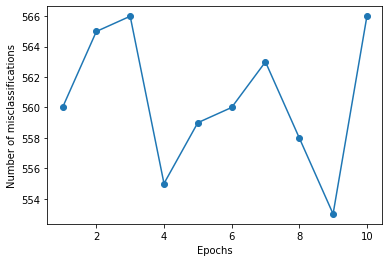

In [125]:
pn = Perceptron(0.1, 10)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?